# Schroeder Reverb Algorithm
The Schroeder reverb algorithm, developed by **Manfred Schroeder** in the 1960s, simulates natural reverberation using a combination of **comb filters** and **all-pass filters**. In this implementation 4 comb filters are used connected in parallel to simulate the early reflections of the reverberation effect. Later two all-pass filters connected in series are used to recreate the late reflections. The algorithm is developed step by step building the filters and explaining their effects graphically before the final full version of the reverb.

## Part 1: Comb Filters

### What is a Comb Filter?
A **comb filter** is an audio effect that mixes a signal with a delayed version of itself, creating constructive/destructive interference. Its frequency response resembles a comb (evenly spaced peaks/notches).

### How It Works
- **Feedforward Comb Filter**: 
`y[n] = x[n] + g * x[n - D]` Mixes the dry signal (`x[n]`) with a delayed copy (`x[n - D]`).

- **Feedback Comb Filter**: 
`y[n] = x[n] + g * y[n - D]` Feeds the output back into the delay line, creating decaying echoes.

**Key Parameters**:
- `D`: Delay time (samples)
- `g`: Gain (-1 to 1, affects echo decay)

In [3]:
import numpy as np

def comb_filter(input_signal, delay_samples, gain, feedback = True):
    """ 
    Applies a comb filter to the input signal.
    
    Parameters: 
        input_signal (array): Input audio signal.
        delay_samples (int): Delay length in samples (> 0).
        gain (float): Feedback/feedforward gain factor of the delayed signal. (-1 to 1).
        feedback (bool): True for feedback, False for feedforward.

    Returns:
        array: Filtered audio signal.
    """
    output_signal = np.zeros_like(input_signal)
    buffer = np.zeros(delay_samples)

    for i in range(len(input_signal)):
        if i < delay_samples:
            delayed_val = 0
        else:
            delayed_val = buffer[i % delay_samples] if feedback else buffer[(i - delay_samples) % delay_samples]
        
        output_signal[i] = input_signal[i] + gain * delayed_val
        
        if feedback:
            buffer[i % delay_samples] = output_signal[i]
        else:
            buffer[i % delay_samples] = input_signal[i]
            
    return output_signal

In [ ]:
# Example usage
if __name__ == "__main__":

    # Create impulse signal
    impulse = np.zeros(10000)
    impulse[0] = 1

    # Parameters
    delay_samples = 100
    gain = 0.8
    feedback = True

    # Apply comb filter
    filtered_audio = comb_filter(impulse, delay_samples, gain, feedback)


**Below is the impulse response of a feedback comb filter** with the following parameters:
- **Delay**: `100 samples`
-**Feedback gain**: `0.8`

The comb effect creates a "ripple" pattern in both time and frequency domains, characteristic of many reverb and echo algorithms.

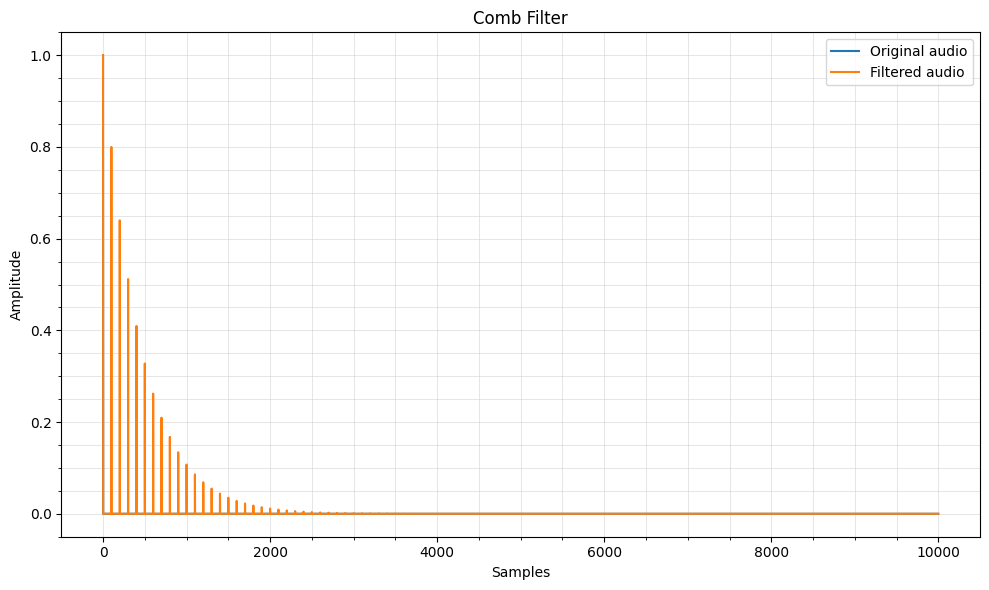

In [17]:

# Plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(impulse, label="Original audio")
plt.grid(True, "both", **{"linestyle": "-", "linewidth": 0.5}, alpha=0.7, color = "0.8")
plt.minorticks_on()
plt.plot(filtered_audio, label="Filtered audio")
plt.title("Comb Filter")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()